In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("list.csv")

df.head(4)

,Type,Url
0,Workshop,https://github.com/LIBREhub/napari-LatAm-works...
1,Lecture,https://github.com/BiAPoL/Bio-image_Analysis_w...
2,Workshop,https://github.com/BiAPoL/PoL-BioImage-Analysi...
3,Workshop,https://github.com/BiAPoL/PoL-BioImage-Analysi...


In [3]:
grouped_data = df.groupby('Type').size()


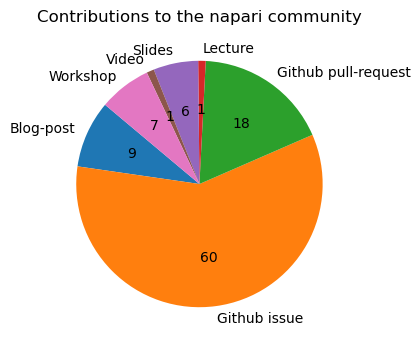

In [4]:
plt.figure(figsize=(4, 4))
plt.pie(grouped_data, labels=grouped_data.index, autopct=lambda p: '{:.0f}'.format(p * sum(grouped_data) / 100), startangle=140)
plt.title('Contributions to the napari community')
plt.savefig('images/summary_pie.png', dpi=300)
plt.show()

## Github contributions


In [5]:
df_github_pr = df[df['Type'].isin(['Github pull-request'])]
df_github_pr.count()

Type    18
Url     18
dtype: int64

In [6]:
df_github_pr = df[df['Type'].isin(['Github issue'])]
df_github_pr.count()

Type    60
Url     60
dtype: int64

In [7]:
df_github = df[df['Type'].isin(['Github pull-request', 'Github issue'])]
df_github.head(4)

,Type,Url
24,Github issue,https://github.com/PolusAI/napari-nyxus/issues/3
25,Github issue,https://github.com/andy-sweet/napari-metadata/...
26,Github issue,https://github.com/andy-sweet/napari-metadata/...
27,Github issue,https://github.com/andy-sweet/napari-metadata/...


In [8]:
df_github['Repository'] = df_github['Url'].str.extract(r'github\.com/[^/]+/([^/]+)')
df_github.head(4)

C:\Users\haase\AppData\Local\Temp\ipykernel_2724\1388113324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_github['Repository'] = df_github['Url'].str.extract(r'github\.com/[^/]+/([^/]+)')


,Type,Url,Repository
24,Github issue,https://github.com/PolusAI/napari-nyxus/issues/3,napari-nyxus
25,Github issue,https://github.com/andy-sweet/napari-metadata/...,napari-metadata
26,Github issue,https://github.com/andy-sweet/napari-metadata/...,napari-metadata
27,Github issue,https://github.com/andy-sweet/napari-metadata/...,napari-metadata


In [9]:
df_github_summary =  df_github.groupby('Repository').size()
df_github_summary = pd.DataFrame(df_github_summary).reset_index()

We have contributed to that many repositories:

In [10]:
df_github_summary.count()

Repository    35
0             35
dtype: int64

In [11]:
df_github_summary['Repository'].tolist()

['RedLionfish',
 'arboretum',
 'cookiecutter-napari-plugin',
 'napari',
 'napari-LF',
 'napari-aicsimageio',
 'napari-animation',
 'napari-aydin',
 'napari-bio-sample-data',
 'napari-buds',
 'napari-czann-segment',
 'napari-dexp',
 'napari-graph',
 'napari-help',
 'napari-hub',
 'napari-hub-collections',
 'napari-matplotlib',
 'napari-metadata',
 'napari-n2v',
 'napari-nD-annotator',
 'napari-nasa-samples',
 'napari-nlm',
 'napari-nyxus',
 'napari-ome-zarr',
 'napari-organoid-counter',
 'napari-pystackreg',
 'napari-roi',
 'napari-spreadsheet',
 'napari-threedee',
 'napari-tyssue',
 'napari_lattice',
 'npe2',
 'stardist-napari',
 'superqt',
 'vispy']

Let's identify napari-plugins roughly

In [12]:
df_napari_plugins = df_github_summary[df_github_summary['Repository'].str.startswith('napari-')]
some_names = df_napari_plugins['Repository'].tolist()
some_names

['napari-LF',
 'napari-aicsimageio',
 'napari-animation',
 'napari-aydin',
 'napari-bio-sample-data',
 'napari-buds',
 'napari-czann-segment',
 'napari-dexp',
 'napari-graph',
 'napari-help',
 'napari-hub',
 'napari-hub-collections',
 'napari-matplotlib',
 'napari-metadata',
 'napari-n2v',
 'napari-nD-annotator',
 'napari-nasa-samples',
 'napari-nlm',
 'napari-nyxus',
 'napari-ome-zarr',
 'napari-organoid-counter',
 'napari-pystackreg',
 'napari-roi',
 'napari-spreadsheet',
 'napari-threedee',
 'napari-tyssue']

In [13]:
with open("snippets/summary_repositories.txt", "w") as file:
    file.write(", ".join(some_names))

In [14]:
len(some_names)

26

## Blog posts

In [15]:
df_blog = df[df['Type'].isin(['Blog-post'])]
" ".join(df_blog['Url'].tolist())

'https://biapol.github.io/blog/mara_lampert/getting_started_with_mambaforge_and_python/readme.html https://focalplane.biologists.com/2023/06/01/tracking-in-napari/ https://focalplane.biologists.com/2023/05/03/feature-extraction-in-napari/ https://focalplane.biologists.com/2023/04/13/quality-assurance-of-segmentation-results/ https://focalplane.biologists.com/2023/03/30/annotating-3d-images-in-napari/ https://focalplane.biologists.com/2023/03/02/rescaling-images-and-pixel-anisotropy/ https://focalplane.biologists.com/2023/04/30/scientific-data-analysis-user-documentation-101/ https://focalplane.biologists.com/2023/05/06/if-you-license-it-itll-be-harder-to-steal-it-why-we-should-license-our-work/ https://focalplane.biologists.com/2023/02/15/sharing-research-data-with-zenodo/'

## Slides

In [16]:
df_blog = df[df['Type'].isin(['Slides'])]
" ".join(df_blog['Url'].tolist())

'https://f1000research.com/slides/12-972 https://f1000research.com/slides/12-937 https://f1000research.com/slides/12-587 https://f1000research.com/slides/12-584 https://f1000research.com/slides/12-573 https://f1000research.com/slides/11-1351'

## Workshops

In [17]:
df_blog = df[df['Type'].isin(['Workshop'])]
" ".join(df_blog['Url'].tolist())

'https://github.com/LIBREhub/napari-LatAm-workshop-2023 https://github.com/BiAPoL/PoL-BioImage-Analysis-TS-GPU-Accelerated-Image-Analysis https://github.com/BiAPoL/PoL-BioImage-Analysis-TS-Early-Career-Track https://github.com/BiAPoL/Quantitative_Bio_Image_Analysis_with_Python_2022 https://github.com/BiAPoL/DIGS-BB_LM_Course_Bio-Image_Analysis_2022 https://github.com/BiAPoL/Image-data-science-with-Python-and-Napari-EPFL2022 https://github.com/BiAPoL/Pasteur-NEUBIAS-training-school-on-Bioimage-Analysis'